In [114]:
import boto3
from boto3.dynamodb.conditions import Key, Attr
import matplotlib.pyplot as plt
import numpy as np
from itertools import groupby
import collections
import pandas as pd
from scipy.signal import savgol_filter

In [47]:
def review_freq(scores):
    scores.sort()
    score_freq = [len(list(group)) for key, group in groupby(scores)]
    unique_scores = list(set(scores))
    unique_scores.sort()
    return score_freq, unique_scores

In [2]:
dynamodb = boto3.resource('dynamodb')

table = dynamodb.Table("pitchfork_reviews")

response = table.scan(
        FilterExpression=Attr('albumReleaseYear').lt(3000)
)

data = []
data.extend(response['Items'])

# get all data
while 'LastEvaluatedKey' in response:
  try:
    response = table.scan(
          ExclusiveStartKey=response['LastEvaluatedKey'],
          FilterExpression=Attr('albumReleaseYear').lt(3000)
    )
    data.extend(response['Items'])
  except:
    print("sleeping...")
    sleep(30)


In [12]:
print("Average Rating")
scores = [float(d['rating']) for d in data]
print(np.mean(scores))

print("\nRating std")
print(np.std(scores))

Average Rating
7.02326787021

Rating std
1.26988629586


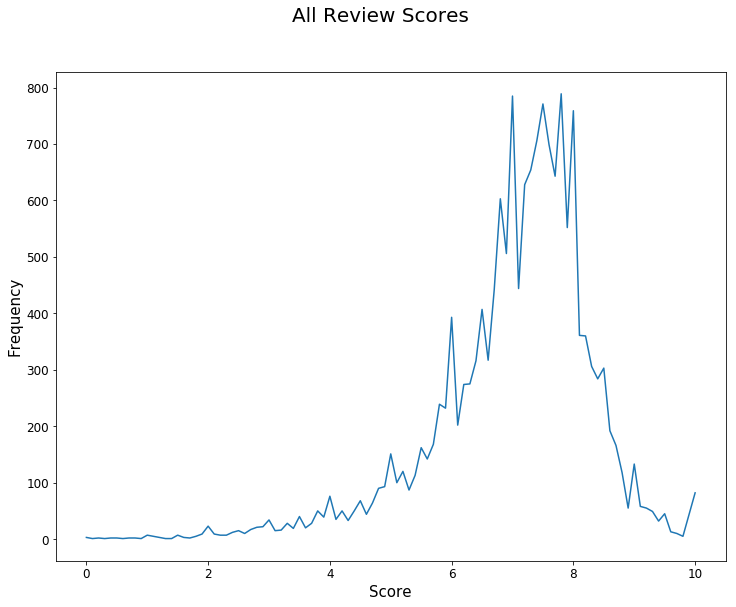

In [78]:
%matplotlib inline

score_freq = [len(list(group)) for key, group in groupby(scores)]
unique_scores = list(set(scores))
unique_scores.sort()

f =plt.figure (figsize=(12, 9))

plt.plot(unique_scores, score_freq, label = 'All Reviews')
f .suptitle ('All Review Scores', fontsize=20)
ax = f.add_subplot(111)
ax .tick_params (labelsize=12)

plt.xlabel('Score', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

In [46]:
rap_reviews = [float(d['rating']) for d in data if d['genre'] == 'Rap']
rock_reviews = [float(d['rating']) for d in data if d['genre'] == 'Rock']
electronic_reviews = [float(d['rating']) for d in data if d['genre'] == 'Electronic']
folk_reviews = [float(d['rating']) for d in data if d['genre'] == 'Folk']
jazz_reviews = [float(d['rating']) for d in data if d['genre'] == 'Jazz']
experimental_reviews = [float(d['rating']) for d in data if d['genre'] == 'Experimental']
global_reviews = [float(d['rating']) for d in data if d['genre'] == 'Global']
metal_reviews = [float(d['rating']) for d in data if d['genre'] == 'Metal']

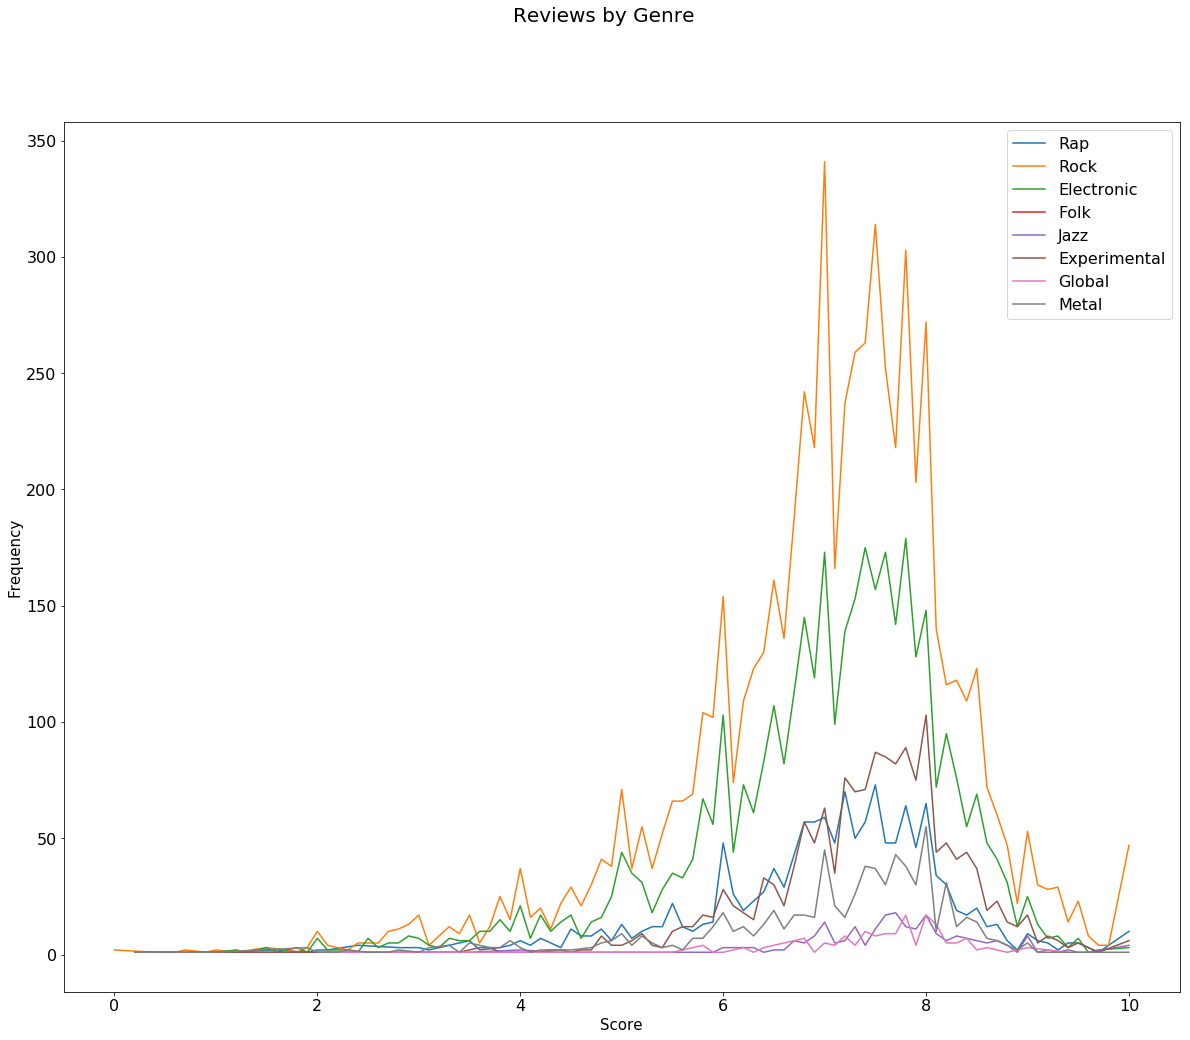

In [89]:
rap_freq, rap_unique = review_freq(rap_reviews)
rock_freq, rock_unique = review_freq(rock_reviews)
elec_freq, elec_unique = review_freq(electronic_reviews)
folk_freq, folk_unique = review_freq(folk_reviews)
jazz_freq, jazz_unique = review_freq(jazz_reviews)
exper_freq, exper_unique = review_freq(experimental_reviews)
glob_freq, glob_unique = review_freq(global_reviews)
metal_freq, metal_unique = review_freq(metal_reviews)


f =plt.figure (figsize=(20, 16))

f .suptitle ('Reviews by Genre', fontsize=20)
ax = f.add_subplot(111)
ax .tick_params (labelsize=16)


plt.plot(rap_unique, rap_freq, label = 'Rap')
plt.plot(rock_unique, rock_freq, label = 'Rock')
plt.plot(elec_unique, elec_freq, label = 'Electronic')
plt.plot(folk_unique, folk_freq, label = 'Folk')
plt.plot(jazz_unique, jazz_freq, label = 'Jazz')
plt.plot(exper_unique, exper_freq, label = 'Experimental')
plt.plot(glob_unique, glob_freq, label = 'Global')
plt.plot(metal_unique, metal_freq, label = 'Metal')

plt.xlabel('Score', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.legend(loc = 'best', prop={'size': 16})
plt.show()

In [97]:
artists = [d['artistName'] for d in data]
counter = collections.Counter(artists)
counter.most_common(40)

[('Animal Collective', 13),
 ('Prince', 13),
 ('Brian Eno', 13),
 ('Bonnie “Prince” Billy', 13),
 ('Neil Young', 13),
 ('Bright Eyes', 12),
 ('Drive-By Truckers', 12),
 ('My Morning Jacket', 12),
 ('The Chemical Brothers', 12),
 ('Excepter', 12),
 ('Sufjan Stevens', 12),
 ('Stereolab', 12),
 ('Radiohead', 12),
 ('David Bowie', 12),
 ('Mouse on Mars', 12),
 ('Destroyer', 12),
 ('Belle and Sebastian', 12),
 ('Robert Pollard', 12),
 ('Liars', 12),
 ('Morrissey', 12),
 ('Johnny Cash', 12),
 ('Arthur Russell', 12),
 ('William Basinski', 12),
 ('Ryan Adams', 12),
 ('The Fall', 12),
 ('Mogwai', 12),
 ('Björk', 12),
 ('Gucci Mane', 12),
 ('The Beatles', 12),
 ('Saint Etienne', 12),
 ('Richard Youngs', 12),
 ('Xiu Xiu', 12),
 ('Guided by Voices', 12),
 ('Thee Oh Sees', 12),
 ('R.E.M.', 12),
 ('Yo La Tengo', 12),
 ('The Decemberists', 12),
 ('Ellen Allien', 12),
 ('Sonic Youth', 12),
 ('Squarepusher', 12)]

In [96]:
reviewers = [d['authorName'] for d in data]
reviewer_counter = collections.Counter(reviewers)
reviewer_counter.most_common(20)

[('Ian Cohen', 668),
 ('Joe Tangari', 647),
 ('Stephen M. Deusner', 630),
 ('Brian Howe', 455),
 ('Stuart Berman', 433),
 ('Mark Richardson', 420),
 ('Marc Hogan', 412),
 ('Nate Patrin', 301),
 ('Jayson Greene', 279),
 ('Marc Masters', 263),
 ('Brandon Stosuy', 257),
 ('Philip Sherburne', 251),
 ('Jason Crock', 241),
 ('Andy Beta', 229),
 ('Jess Harvell', 228),
 ('Matthew Murphy', 228),
 ('Grayson Currin', 222),
 ('Rob Mitchum', 221),
 ('Andrew Gaerig', 209),
 ('Dominique Leone', 206)]

In [100]:
datatable = pd.DataFrame(data)

In [204]:
#albums with a perfect score
idx = (datatable.rating == 10.0)
pd.set_option('display.max_rows', len(idx))
datatable.loc[idx, ['artistName', 'albumName']]

artistName  \
169                                    Beastie Boys   
201                                         Nirvana   
282                                        Pavement   
378                                         J Dilla   
415                                          Prince   
476    ...And You Will Know Us by the Trail of Dead   
833                            A Tribe Called Quest   
961                                     Nina Simone   
1084                                         Prince   
1269                             Neutral Milk Hotel   
1697                                   Glenn Branca   
1853                                       The Cure   
2192                                    The Beatles   
2260                                     Neil Young   
2331                                      DJ Shadow   
2811                               Ghostface Killah   
3023                                     The Smiths   
3057                                       Pavement   
3316                                    The Beatles   
3502                                       D’Angelo   
3535                                      Bob Dylan   
3800                         The Velvet Underground   
3878                                     Television   
3981                                  John Coltrane   
4043                                         Prince   
4069                                  Elliott Smith   
4238                                     X-Ray Spex   
4452                                      Talk Talk   
4655                                    David Bowie   
4674                           The Notorious B.I.G.   
4826                                   Joy Division   
4947                                            Can   
5104                                        Nirvana   
5167                                  Guns N' Roses   
5207                             The Rolling Stones   
5380                                      Metallica   
5861                                    The Beatles   
6219                            My Bloody Valentine   
6489                             The Rolling Stones   
7049                                            Nas   
7373                                    Sonic Youth   
7390                                   Public Enemy   
7609                                      Radiohead   
7620                                    Glenn Gould   
7700                                         R.E.M.   
7888                                      The Clash   
8152                                  Fleetwood Mac   
8280                              Bruce Springsteen   
9060                                    David Bowie   
9801                                  Spiritualized   
10426                                   The Beatles   
10449                                  Otis Redding   
10503                                     Radiohead   
10574                                         Slint   
10855                                  Van Morrison   
11460                                 Stevie Wonder   
11571                                        Prince   
11899                                     Brian Eno   
11940                                 John Coltrane   
12078                                        R.E.M.   
12088                        The Velvet Underground   
12172                                   The Beatles   
12568                              William Basinski   
12615                                The Beach Boys   
12998                                          Wire   
13099                              Public Image Ltd   
13104                                        Weezer   
13150                                     Mobb Deep   
13162                                        Weezer   
13324                               The Stone Roses   
13942                              Serge Gainsbourg   
13969                               Michael Jackson   
13981                     

In [104]:
#albums with a zero score
idx = (datatable.rating == '0.0')
datatable.loc[idx, ['artistName', 'albumName']]

artistName  albumName
1150               Jet   Shine On
10645  Travis Morrison  Travistan
11584        Liz Phair  Liz Phair

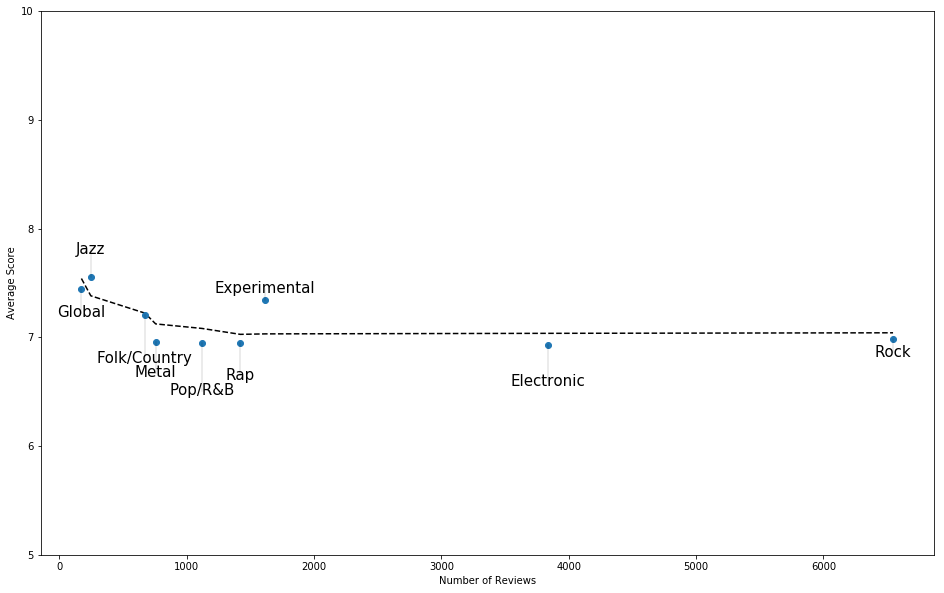

In [133]:
datatable['rating'] = datatable['rating'].astype(float) 

g = datatable.groupby('genre')
table = g['rating'].agg(['count', 'mean', 'std']).reset_index()

f =plt.figure (figsize=(16, 10))


# plot the average at each level of count
avgline = table.groupby('count')['mean'].mean().reset_index()
avgline['mean'] = savgol_filter(avgline['mean'], 5, 1)
plt.plot(avgline['count'], avgline['mean'],'k--')

plt.plot(table['count'],table['mean'],'o', alpha = 1)

for j, row in table.iterrows():
    curr_avg = float(avgline.loc[avgline['count'] == row['count'], 'mean'])
    jitter = np.random.uniform(0.1, high = 0.5)
    if row['mean'] < curr_avg: jitter*= -1.0
    
    plt.plot([row['count'], row['count']], [row['mean'], row['mean'] + jitter], 'k-', alpha = .1)
    plt.text(row['count'], row['mean'] + jitter, row['genre'], 
             ha = 'center', va = 'center', fontsize=15)

plt.ylabel('Average Score')
plt.xlabel('Number of Reviews')
plt.ylim([5, 10])
plt.show()

In [202]:
g = datatable.groupby('genre')
table = g['rating'].agg(['count', 'mean', 'std'])
table

count      mean       std
genre                                  
Electronic     3834  6.934038  1.283513
Experimental   1618  7.346106  1.063343
Folk/Country    673  7.206538  1.037361
Global          175  7.446857  1.021931
Jazz            249  7.553815  1.161546
Metal           758  6.959763  1.380216
Pop/R&B        1121  6.948707  1.253146
Rap            1422  6.949719  1.261924
Rock           6546  6.981485  1.310626

## Exploration of Authors

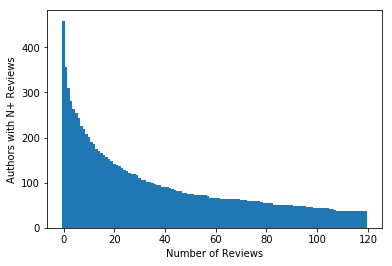

In [140]:
g = datatable.groupby('authorName')
author_counts = g.size().reset_index()
x = range(120)
y = [sum(author_counts[0] > i) for i in x]
plt.bar(x, y, width = 1, edgecolor='none')
plt.xlabel('Number of Reviews')
plt.ylabel('Authors with N+ Reviews')
plt.show()

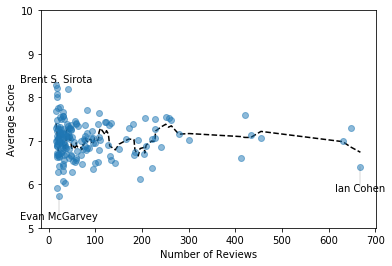

In [142]:
g = datatable.groupby('authorName')
table = g.rating.agg(('mean','std','count'))
table['ratio'] = table['mean'] / table['count']

# remove labels with only a handful of reviews
table = table.loc[table['count'] > 15]

# plot the average at each level of count
avgline = table.groupby('count')['mean'].mean().reset_index()
avgline['mean'] = savgol_filter(avgline['mean'], 5, 1)
plt.plot(avgline['count'], avgline['mean'],'k--')

# plot each author as a point
plt.plot(table['count'], table['mean'],'o', alpha = 0.5)

# identify some standouts
items = [
         table['mean'].idxmax(), 
         table['mean'].idxmin(),
         table['count'].idxmax()
        ]

for idx in items:
    
    x, y = table.loc[idx, 'count'], table.loc[idx, 'mean']
    curr_avg = float(avgline.loc[avgline['count'] == x, 'mean'])
        
    jitter = np.random.uniform(0.1, high = 0.5)
    if y < curr_avg: jitter*= -1.0
    
    plt.plot([x, x], [y, y + jitter], 'k-', alpha = 0.1)
    plt.text(x, y + jitter, idx, ha = 'center', va = 'center')

plt.ylabel('Average Score')
plt.xlabel('Number of Reviews')
plt.ylim([5, 10])
plt.show()


## Most active authors

In [196]:
top_authors = datatable.groupby('authorName').albumName.agg('count').nlargest(5)
top_authors

authorName
Ian Cohen             668
Joe Tangari           647
Stephen M. Deusner    630
Brian Howe            455
Stuart Berman         433
Name: albumName, dtype: int64

#### Ian Cohen

In [191]:
ian  = datatable.loc[datatable['authorName'] ==  'Ian Cohen']
ian.groupby('genre').describe()

rating                                                  
              count      mean       std  min    25%  50%    75%   max
genre                                                                
Electronic     94.0  5.964894  1.838110  0.2  5.100  6.0  7.175   9.1
Experimental   31.0  6.467742  1.416189  3.0  5.950  6.3  7.550   8.5
Folk/Country   13.0  6.776923  1.462392  4.9  5.400  6.9  7.600   9.2
Global          1.0  2.200000       NaN  2.2  2.200  2.2  2.200   2.2
Jazz            1.0  6.300000       NaN  6.3  6.300  6.3  6.300   6.3
Metal          18.0  6.072222  1.877359  2.8  4.725  6.3  7.625   8.8
Pop/R&B        40.0  6.490000  1.342176  1.8  5.775  6.3  7.625   8.5
Rap            85.0  6.107059  1.711083  1.6  5.200  6.2  7.500  10.0
Rock          385.0  6.586234  1.410615  1.9  5.800  6.7  7.700  10.0

#### Joe Tangari

In [197]:
ian  = datatable.loc[datatable['authorName'] ==  'Joe Tangari']
ian.groupby('genre').describe()

rating                                                   
              count      mean       std  min    25%   50%    75%   max
genre                                                                 
Electronic     74.0  7.278378  0.893089  3.5  6.900  7.50  7.800   8.9
Experimental   45.0  7.377778  1.141946  2.1  7.000  7.60  7.900   9.4
Folk/Country   35.0  7.374286  0.692541  5.1  7.200  7.40  7.750   8.6
Global         47.0  7.712766  0.399792  6.8  7.500  7.80  8.000   8.4
Jazz           20.0  7.685000  0.532398  6.9  7.200  7.65  7.975   9.0
Metal          12.0  6.533333  1.611512  3.1  6.325  7.25  7.525   7.9
Pop/R&B        47.0  7.323404  0.772689  4.7  7.000  7.50  7.800   8.8
Rap             7.0  7.842857  0.607885  6.9  7.400  8.20  8.300   8.4
Rock          360.0  7.219167  0.974576  2.7  6.800  7.40  7.800  10.0

#### Stephen M. Deusner

In [198]:
ian  = datatable.loc[datatable['authorName'] ==  'Stephen M. Deusner']
ian.groupby('genre').describe()

rating                                                   
              count      mean       std  min    25%   50%    75%   max
genre                                                                 
Electronic     29.0  6.751724  1.144122  3.6  6.200  6.90  7.600   8.4
Experimental    8.0  6.650000  0.989949  5.7  5.775  6.35  7.425   8.2
Folk/Country  106.0  7.283962  1.044545  3.0  7.000  7.40  7.800   9.7
Global          2.0  8.400000  0.565685  8.0  8.200  8.40  8.600   8.8
Jazz            3.0  7.800000  0.200000  7.6  7.700  7.80  7.900   8.0
Metal           1.0  5.900000       NaN  5.9  5.900  5.90  5.900   5.9
Pop/R&B        37.0  6.900000  1.364633  3.3  6.500  7.20  7.800   8.7
Rap             1.0  3.600000       NaN  3.6  3.600  3.60  3.600   3.6
Rock          443.0  6.961400  1.261643  2.1  6.350  7.20  7.800  10.0

#### Brian Howe

In [199]:
ian  = datatable.loc[datatable['authorName'] ==  'Brian Howe']
ian.groupby('genre').describe()

rating                                                  
              count      mean       std  min    25%   50%    75%  max
genre                                                                
Electronic    140.0  6.957857  0.974131  2.9  6.375  7.25  7.600  9.0
Experimental   59.0  7.155932  0.936293  4.8  6.650  7.30  7.800  9.3
Folk/Country   17.0  7.011765  0.687279  5.7  6.700  7.40  7.500  7.7
Global          4.0  7.500000  0.697615  6.5  7.325  7.70  7.875  8.1
Jazz            9.0  6.977778  1.121135  4.4  6.800  7.30  7.700  8.2
Metal          13.0  7.284615  0.760314  5.0  7.000  7.70  7.700  7.7
Pop/R&B        15.0  6.673333  1.109998  4.2  5.850  6.90  7.600  8.0
Rap            21.0  7.180952  1.117864  2.8  7.000  7.50  7.800  8.0
Rock          177.0  7.116949  0.880370  4.0  6.600  7.40  7.700  9.6

#### Stuart Berman

In [200]:
ian  = datatable.loc[datatable['authorName'] ==  'Stuart Berman']
ian.groupby('genre').describe()

rating                                                   
              count      mean       std  min    25%   50%    75%   max
genre                                                                 
Electronic     57.0  6.798246  1.283757  1.0  6.200  7.00  7.700   8.7
Experimental   28.0  7.360714  0.753923  5.0  6.975  7.30  7.775   8.9
Folk/Country    2.0  7.550000  0.070711  7.5  7.525  7.55  7.575   7.6
Global          1.0  7.200000       NaN  7.2  7.200  7.20  7.200   7.2
Metal          10.0  6.030000  1.980488  1.0  5.500  6.50  7.225   7.8
Pop/R&B        15.0  6.740000  0.878960  5.5  6.000  6.60  7.500   8.2
Rock          320.0  7.227500  0.978448  3.2  6.800  7.30  7.800  10.0

## Authors over time

In [210]:
# subset data
keep_authors = author_counts.authorName[author_counts[0] >= 70]
reviews = datatable[datatable.authorName.isin(keep_authors)]

# clear out space for review order
reviews = datatable.assign(review_num = pd.Series(index=reviews.index))

# count each author's reviews
author_groups = reviews.groupby('authorName')
for a, rows in author_groups:
    values = list(reversed(range(rows.shape[0])))
    reviews.set_value(rows.index, 'review_num', values)

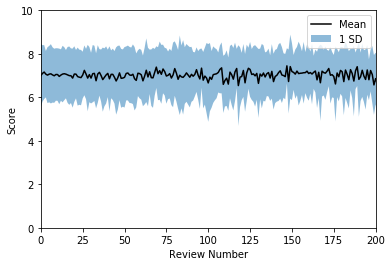

In [212]:
g = reviews.groupby(['review_num'])
table = g['rating'].agg(['mean','std', 'count'])
table = table.reset_index()

x = table['review_num']
y = table['mean']

plt.fill_between(x, y + table['std'], y  - table['std'], alpha = 0.5, label = '1 SD')    
plt.plot(x, y, '-', color = 'k', label = 'Mean')
plt.legend()
plt.axis([0, 200, 0, 10])
plt.xlabel('Review Number')
plt.ylabel('Score')
plt.show()